In [74]:
from scipy.stats import mode
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram,fcluster
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from imblearn.over_sampling import SMOTE,RandomOverSampler
from imblearn.under_sampling import TomekLinks

5067


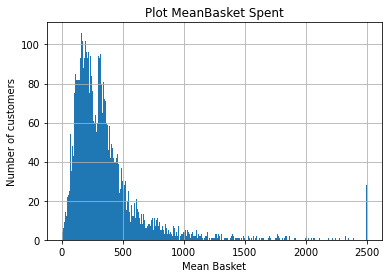

In [75]:
df = pd.read_csv("dataset/CS1-dataset.csv",sep='\t',decimal=",",index_col=0)

#Drop dei customer generati
df = df[~df.CustomerID.str.contains("N")]
print(len(result))

for i in range(len(df)):
    if(df["Mb"].iloc[i]>2500):
        df["Mb"].iloc[i] = 2500

df["Mb"].hist(bins=300)
plt.title("Plot MeanBasket Spent")
plt.xlabel("Mean Basket")
plt.ylabel("Number of customers")
plt.show()
 

In [76]:
print(df["Mb"].mean())
low_value=250
high_value=500
low=len(df[df["Mb"]<low_value])
high=len(df[df["Mb"]>high_value])
print(low) 
print(len(df[(df["Mb"]>=low_value) & (df["Mb"]<=high_value)]))
print(high) 

362.7745381307988
1879
1689
754


In [77]:
def get_label():
     temp = pd.read_csv("dataset/CS1-dataset.csv",sep='\t',decimal=",",index_col=0)
     temp = temp[~temp.CustomerID.str.contains("N")]
     output = []
     for i in range(len(temp)):
          if(df["Mb"].iloc[i]<low_value):
               output.append(0)
          elif(df["Mb"].iloc[i]>high_value):
               output.append(2)
          else:
               output.append(1)

     temp["class"] = output
     return temp

In [78]:
def label(bins=0,label=0):
    df = get_label()
    df[df["class"]==label]["Mb"].hist(bins=bins)
    plt.title("Plot Mean Basket")
    plt.xlabel("Mean Basket")
    plt.ylabel("Number of customers")
    plt.show()

    df[df["class"]==label]["Mb"].plot.box()
    plt.title("Boxplot Mean Basket")
    plt.show()

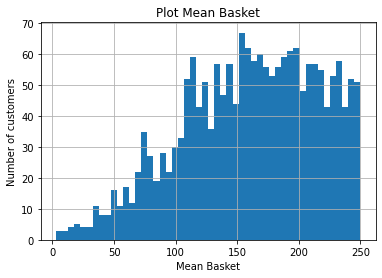

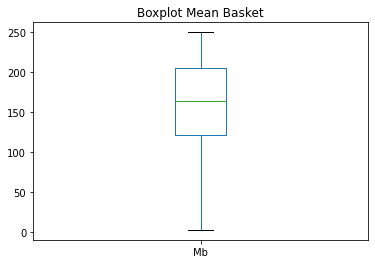

In [79]:
label(bins=50,label=0)

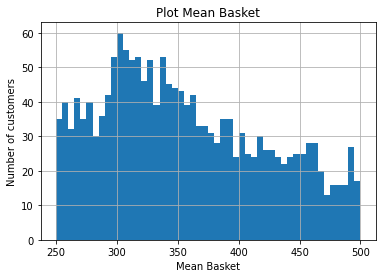

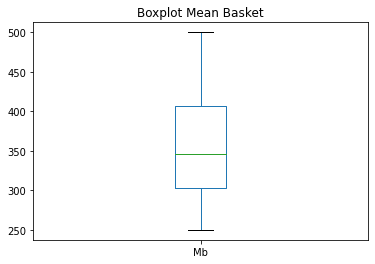

In [80]:
label(bins=50,label=1)

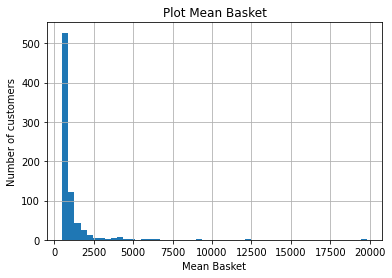

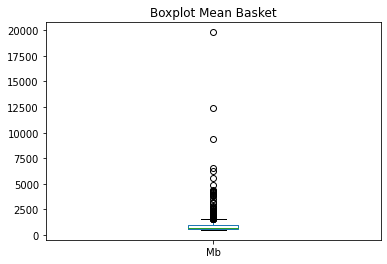

In [81]:
label(bins=50,label=2)

In [82]:
from imblearn.under_sampling import RandomUnderSampler 
def sampling_dataframe(sampling):
    oversampled = get_label()
    oversampled = oversampled.drop(["CustomerID"],axis=1)

    print("Before Len class: 0 "+ str(len(oversampled[oversampled["class"]==0])))
    print("Before Len class: 1 "+ str(len(oversampled[oversampled["class"]==1])))
    print("Before Len class: 2 "+ str(len(oversampled[oversampled["class"]==2])))
    print("---------------------")
    dictionary = {
        0: len(oversampled[oversampled["class"]==0]),
        1: len(oversampled[oversampled["class"]==1]),
        2: len(oversampled[oversampled["class"]==1])
    }
    sm = SMOTE(sampling_strategy=dictionary,random_state=42 )
    X = oversampled.drop(columns=["class"],axis=1)
    X_res, y_res = sm.fit_resample(X, oversampled["class"])
    oversampled = pd.DataFrame(X_res)
    oversampled["class"] = y_res
    dictionary = {
        0: len(oversampled[oversampled["class"]==1]),
        1: len(oversampled[oversampled["class"]==1]),
        2: len(oversampled[oversampled["class"]==1])
    }
    tl = RandomUnderSampler()
    X = oversampled.drop(columns=["class"],axis=1)
    X_res, y_res = tl.fit_resample(X, oversampled["class"])
    oversampled = pd.DataFrame(X_res)
    oversampled["class"] = y_res
    print("After Len class: 0 "+ str(len(oversampled[oversampled["class"]==0])))
    print("After Len class: 1 "+ str(len(oversampled[oversampled["class"]==1])))
    print("After Len class: 2 "+ str(len(oversampled[oversampled["class"]==2])))
    print("---------------------------------------------------------------")
    return oversampled

In [83]:
print("Oversampling the dataset")
result = sampling_dataframe(sampling="over")

Oversampling the dataset
Before Len class: 0 1879
Before Len class: 1 1689
Before Len class: 2 754
---------------------
After Len class: 0 1689
After Len class: 1 1689
After Len class: 2 1689
---------------------------------------------------------------


In [84]:
result = result.drop(columns=["I","Iu","Ts","MaxD","MinD","Mb"])
print(result.head())
print(len(result))

   Imax         E    PIL       MeanD     EDate  class
0    48  5.121928  2.567  111.000000  0.848548      0
1    25  6.125617  2.567   60.333333  1.468334      0
2    24  4.310443  2.567   15.500000  0.000000      0
3    72  4.700440  2.567   77.000000  0.995727      0
4    48  5.831955  2.567   37.200000  1.494785      0
5067


In [85]:

result.to_csv('dataset/CL-dataset.csv', sep='\t', index=True, decimal=",")